In [1284]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.metrics import adjusted_rand_score, accuracy_score

reading the data

In [1285]:
data, labels = load_digits(return_X_y=True)
(n_samples, n_features), n_digits = data.shape, np.unique(labels).size

print(f"# digits: {n_digits}; # samples: {n_samples}; # features {n_features}")
print(labels)
print(data)

# digits: 10; # samples: 1797; # features 64
[0 1 2 ... 8 9 8]
[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


run PCA

In [1286]:
pca = PCA(n_components = 2)

dataNew = pca.fit_transform(data)
n_samples, n_features = dataNew.shape
print(f"# samples: {n_samples}; # features {n_features}")
print(dataNew)

# samples: 1797; # features 2
[[ -1.25947077  21.2748787 ]
 [  7.95761283 -20.76869751]
 [  6.9919248   -9.95598448]
 ...
 [ 10.8012808   -6.96025336]
 [ -4.87210761  12.42393968]
 [ -0.34438948   6.36555128]]


run K-means

In [1287]:
def Kmeans(initial_state, data_selected):
    inertia_list = []
    for i in range(10):
        k = KMeans(n_clusters=i+1, init=initial_state, max_iter=1000)
        k.fit(data_selected)
        inertia_list.append(k.inertia_)

    return inertia_list

using data of 3, 5, 7

In [1288]:
selected_digits = [3, 5, 7]
indexes = np.isin(labels, selected_digits)
data_selected = dataNew[indexes]
labels_selected = labels[indexes]
#print(labels_selected)
#print(data_selected)

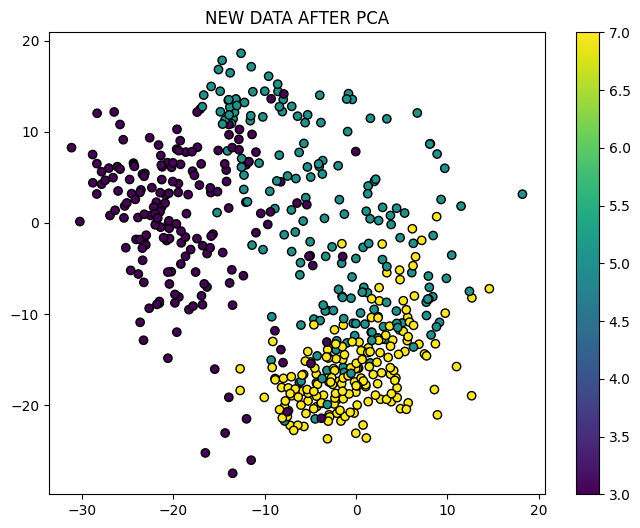

In [1289]:
plt.figure(figsize=(8, 6))
plt.scatter(data_selected[:, 0], data_selected[:, 1], c=labels_selected, edgecolor='k', cmap='viridis')
plt.colorbar()
plt.title('NEW DATA AFTER PCA')
plt.show()

using the kmeans clustering with the kmeans++ init

we got 122844.02325054248 with k = 1
we got 48231.59746659489 with k = 2
we got 33718.59084313944 with k = 3
we got 23743.043197173665 with k = 4
we got 20142.019077078854 with k = 5
we got 16100.35085931695 with k = 6
we got 14241.984179423493 with k = 7
we got 12980.99216355138 with k = 8
we got 11341.950016825853 with k = 9
we got 10171.701093365795 with k = 10


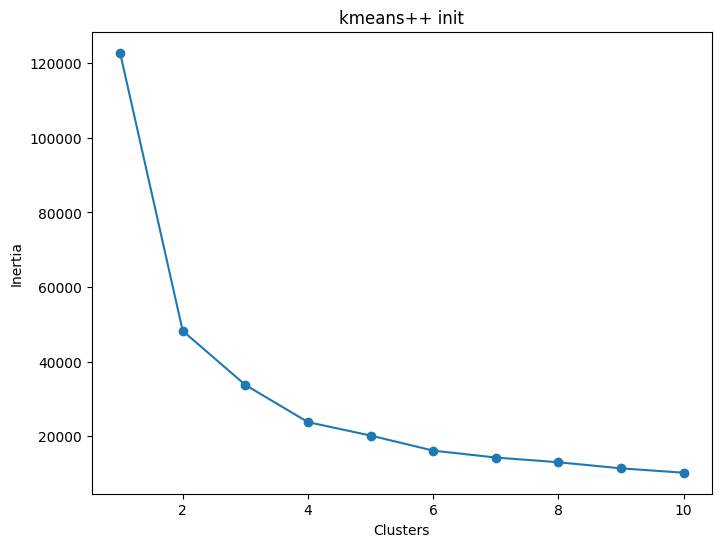

In [1290]:
first = Kmeans("k-means++", data_selected)
for i in range(10):
    print(f"we got {first[i]} with k = {i+1}")

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), first, marker='o')
plt.title('kmeans++ init')
plt.xlabel('Clusters')
plt.ylabel('Inertia')
plt.show()

using the kmeans clustering with the random init

we got 122844.02325054248 with k = 1
we got 48231.59746659489 with k = 2
we got 33710.88989197795 with k = 3
we got 23700.63569082758 with k = 4
we got 19495.044884414117 with k = 5
we got 16043.582994910783 with k = 6
we got 13848.162131835401 with k = 7
we got 12122.13240985217 with k = 8
we got 11046.21776116746 with k = 9
we got 9944.077774558922 with k = 10


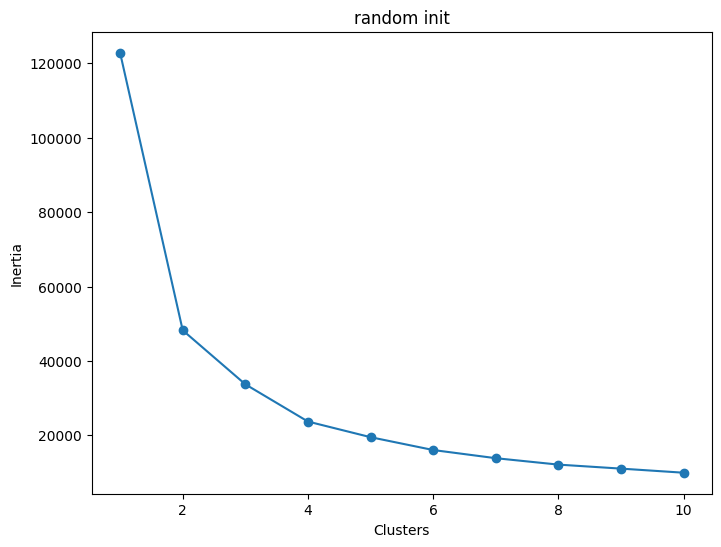

In [1291]:
second = Kmeans("random", data_selected)
for i in range(10):
    print(f"we got {second[i]} with k = {i+1}")

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), second, marker='o')
plt.title('random init')
plt.xlabel('Clusters')
plt.ylabel('Inertia')
plt.show()

run the same thing with another data (2, 1, 6)

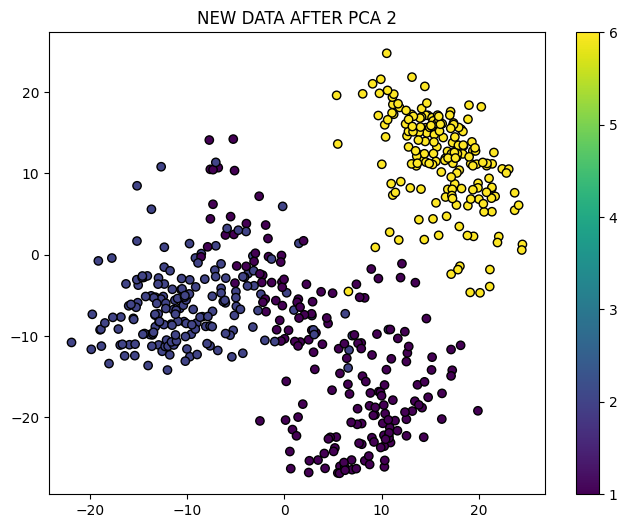

we got 161391.6947716177 with k = 1
we got 66697.21558830782 with k = 2
we got 30508.69275325542 with k = 3
we got 24286.78131316977 with k = 4
we got 18859.809493893143 with k = 5
we got 14883.290462164823 with k = 6
we got 12928.360216626608 with k = 7
we got 11823.107326623605 with k = 8
we got 10658.883758796135 with k = 9
we got 9409.20674957872 with k = 10


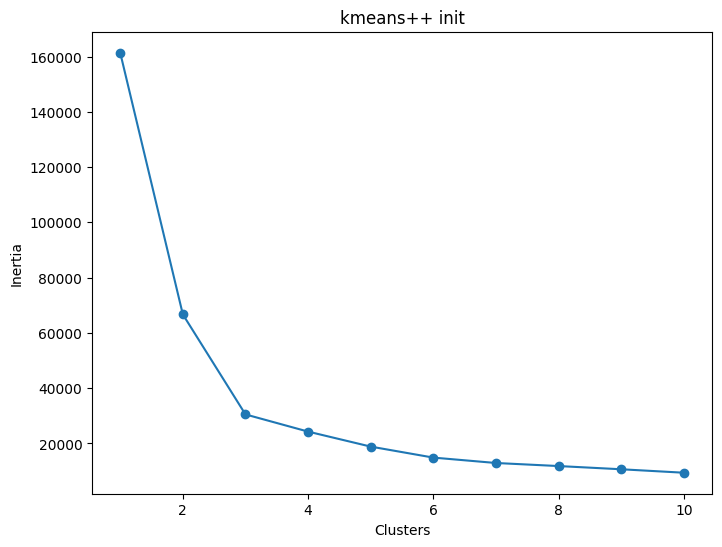

we got 161391.6947716177 with k = 1
we got 66697.21558830782 with k = 2
we got 30499.543851968425 with k = 3
we got 23413.962744277887 with k = 4
we got 18816.70317440118 with k = 5
we got 14872.99134647199 with k = 6
we got 12816.501778435882 with k = 7
we got 11386.385168363706 with k = 8
we got 10021.91812458165 with k = 9
we got 9132.154446942346 with k = 10


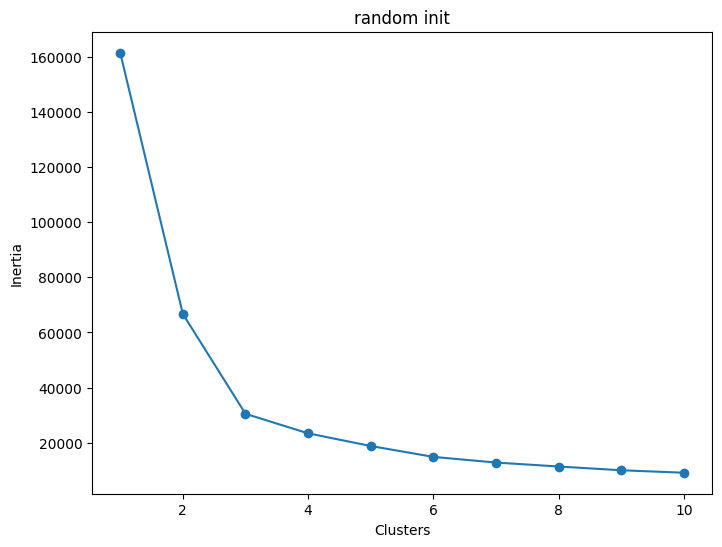

In [1292]:
selected_digits2 = [1, 2, 6]
indexes2 = np.isin(labels, selected_digits2)
data_selected2 = dataNew[indexes2]
labels_selected2 = labels[indexes2]
#print(labels_selected2)

plt.figure(figsize=(8, 6))
plt.scatter(data_selected2[:, 0], data_selected2[:, 1], c=labels_selected2, edgecolor='k', cmap='viridis')
plt.colorbar()
plt.title('NEW DATA AFTER PCA 2')
plt.show()

first2 = Kmeans("k-means++", data_selected2)
for i in range(10):
    print(f"we got {first2[i]} with k = {i+1}")

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), first2, marker='o')
plt.title('kmeans++ init')
plt.xlabel('Clusters')
plt.ylabel('Inertia')
plt.show()

second2 = Kmeans("random", data_selected2)
for i in range(10):
    print(f"we got {second2[i]} with k = {i+1}")

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), second2, marker='o')
plt.title('random init')
plt.xlabel('Clusters')
plt.ylabel('Inertia')
plt.show()

we noticed that when we used it for the data of (3, 5, 7) the algorithm gave the best k as 4 but when we used it on data of(1, 2, 6) it gave the best k as 3 that is the correct one, we think that this happened because of the data of these numbers when we saw the data draw of the first three numbers there was a lot of data that is not in its group and the data of all the different numbers was close to theirselves not like the second three numbers that were something like three different groups that the alghorithm can find them easily

run GMM

In [1293]:
def GMM(data_selected):
    G = GaussianMixture(n_components=3, covariance_type="spherical", max_iter=1000)
    G.fit(data_selected)
    return G

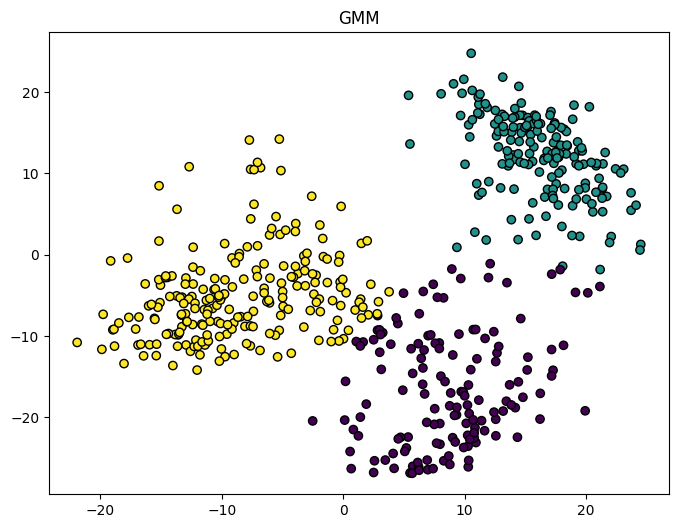

In [1294]:
g = GMM(data_selected2)
y_predicted = g.predict(data_selected2)

plt.figure(figsize=(8, 6))
plt.scatter(data_selected2[:, 0], data_selected2[:, 1], c=y_predicted, edgecolor='k', cmap='viridis')
plt.title('GMM')
plt.show()

finding the cost of every iteration

In [1295]:
temp_data = data_selected

g2 = GaussianMixture(n_components=3, covariance_type="spherical", max_iter=100, verbose=2, tol=1e-4)
g2.fit(temp_data)

print()

temp_data2 = data_selected2

g2 = GaussianMixture(n_components=3, covariance_type="spherical", max_iter=100, verbose=2, tol=1e-9)
g2.fit(temp_data2)

Initialization 0
  Iteration 10	 time lapse 0.01861s	 ll change 0.00018
Initialization converged: True	 time lapse 0.01861s	 ll -7.20221

Initialization 0
  Iteration 10	 time lapse 0.00000s	 ll change 0.00003
  Iteration 20	 time lapse 0.00000s	 ll change 0.00000
  Iteration 30	 time lapse 0.01377s	 ll change 0.00000
Initialization converged: True	 time lapse 0.01529s	 ll -7.20871


GaussianMixture(covariance_type='spherical', n_components=3, tol=1e-09,
                verbose=2)

we tried first to use the GMM.lower_bound_ and didnt found any difference in it then we found the verbose argument that gives the cost difference between some iterations for example between the 9th iteration and the 10th iteration with this we could see that the cost doesnt get that difference  in these iteratins because the real defference is between the first two iterations 

In [1296]:
k = KMeans(n_clusters=3, init="k-means++", max_iter=1000)
k.fit(data_selected2)
y_predicted2 = k.predict(data_selected2)

computing the ARI

In [1297]:
ari_kmeans = adjusted_rand_score(labels_selected2, y_predicted2)
ari_gmm = adjusted_rand_score(labels_selected2, y_predicted)
print(f"Adjusted Rand Index for K-means algorithm: {ari_kmeans}")
print(f"Adjusted Rand Index for GMM algorithm: {ari_gmm}")

Adjusted Rand Index for K-means algorithm: 0.7137438706382738
Adjusted Rand Index for GMM algorithm: 0.6954160594908503


finding the accuracy of these two algorithm

In [1298]:
kmeans_right = 0
GMM_right = 0
for i in range(len(labels_selected2)):
    if y_predicted2[i] == labels_selected2[i]:
        kmeans_right += 1
    
    if y_predicted[i] == labels_selected2[i]:
        GMM_right += 1

kmeans_accuracy = accuracy_score(labels_selected2, y_predicted2)
GMM_accuracy = accuracy_score(labels_selected2, y_predicted)
print(f"we got {kmeans_right} in the kmeans algorithm out of {len(labels_selected2)} with accuracy of {kmeans_accuracy}")
print(f"we got {GMM_right} in the GMM algorithm out of {len(labels_selected2)} with accuracy of {GMM_accuracy}")

we got 59 in the kmeans algorithm out of 540 with accuracy of 0.10925925925925926
we got 169 in the GMM algorithm out of 540 with accuracy of 0.31296296296296294
